In [1]:
import sys
sys.path.append('RenderMan/Builds/LinuxMakefile/build')
import librenderman as rm

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Audio


In [2]:

# Important settings. These are good general ones.
sampleRate = 44100
bufferSize = 512
fftSize = 512

# This will host a VST. It will render the features and audio we need.
engine = rm.RenderEngine(sampleRate, bufferSize, fftSize)

# Load the VST into the RenderEngine.
path = "Dexed.so"
engine.load_plugin(path)


# Create a patch generator. We can initialise it to generate the correct
# patches for a given synth by passing it a RenderEngine which has
# loaded a instance of the synthesiser. 
generator = rm.PatchGenerator(engine)

# We can also get a string of information about the
# available parameters.
# print (engine.get_plugin_parameters_description())


In [3]:
# Get a random patch and set it.
new_patch = generator.get_random_patch()
engine.set_patch(new_patch)

# We need to override some parameters to prevent hanging notes in
# Dexed. 
overriden_parameters = [(26, 1.),  (30, 0.),  (48, 1.),  (52, 0.), 
                        (70, 1.),  (74, 0.),  (92, 1.),  (96, 0.), 
                        (114, 1.), (118, 0.), (136, 1.), (140, 0.)]

# Loop through each tuple, unpack it and override the correct
# parameter with the correct value to prevent hanging notes.
for parameter in overriden_parameters:
    index, value = parameter
    engine.override_plugin_parameter(index, value)


# Settings to play a note and extract data from the synth.
midiNote = 40
midiVelocity = 127
noteLength = 4.0
renderLength = 5.0

# Render the data. 
engine.render_patch(midiNote, midiVelocity, noteLength, renderLength)

# Get the data. Note the audio is automatically made mono, no
# matter what channel size for ease of use.
audio = engine.get_audio_frames()


Text(0.5,0,'Time (frame count)')

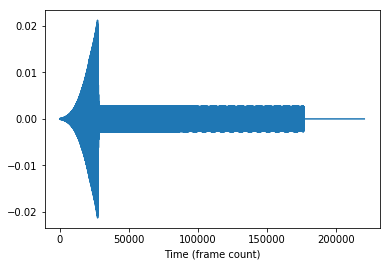

In [4]:
plt.plot(audio)
plt.xlabel('Time (frame count)')

In [5]:
Audio(audio, rate=sampleRate)


In [6]:
print(audio[:10])

[4.5106096635549875e-09, 1.1535093769055038e-08, 9.965902769693002e-09, 7.937820178938182e-09, 1.068184385388804e-08, 9.18970322061341e-09, 9.024764047182998e-09, 1.014370720753277e-08, 9.026321023952733e-09, 9.564955050223034e-09]
